# Neural Networks with Pytorch

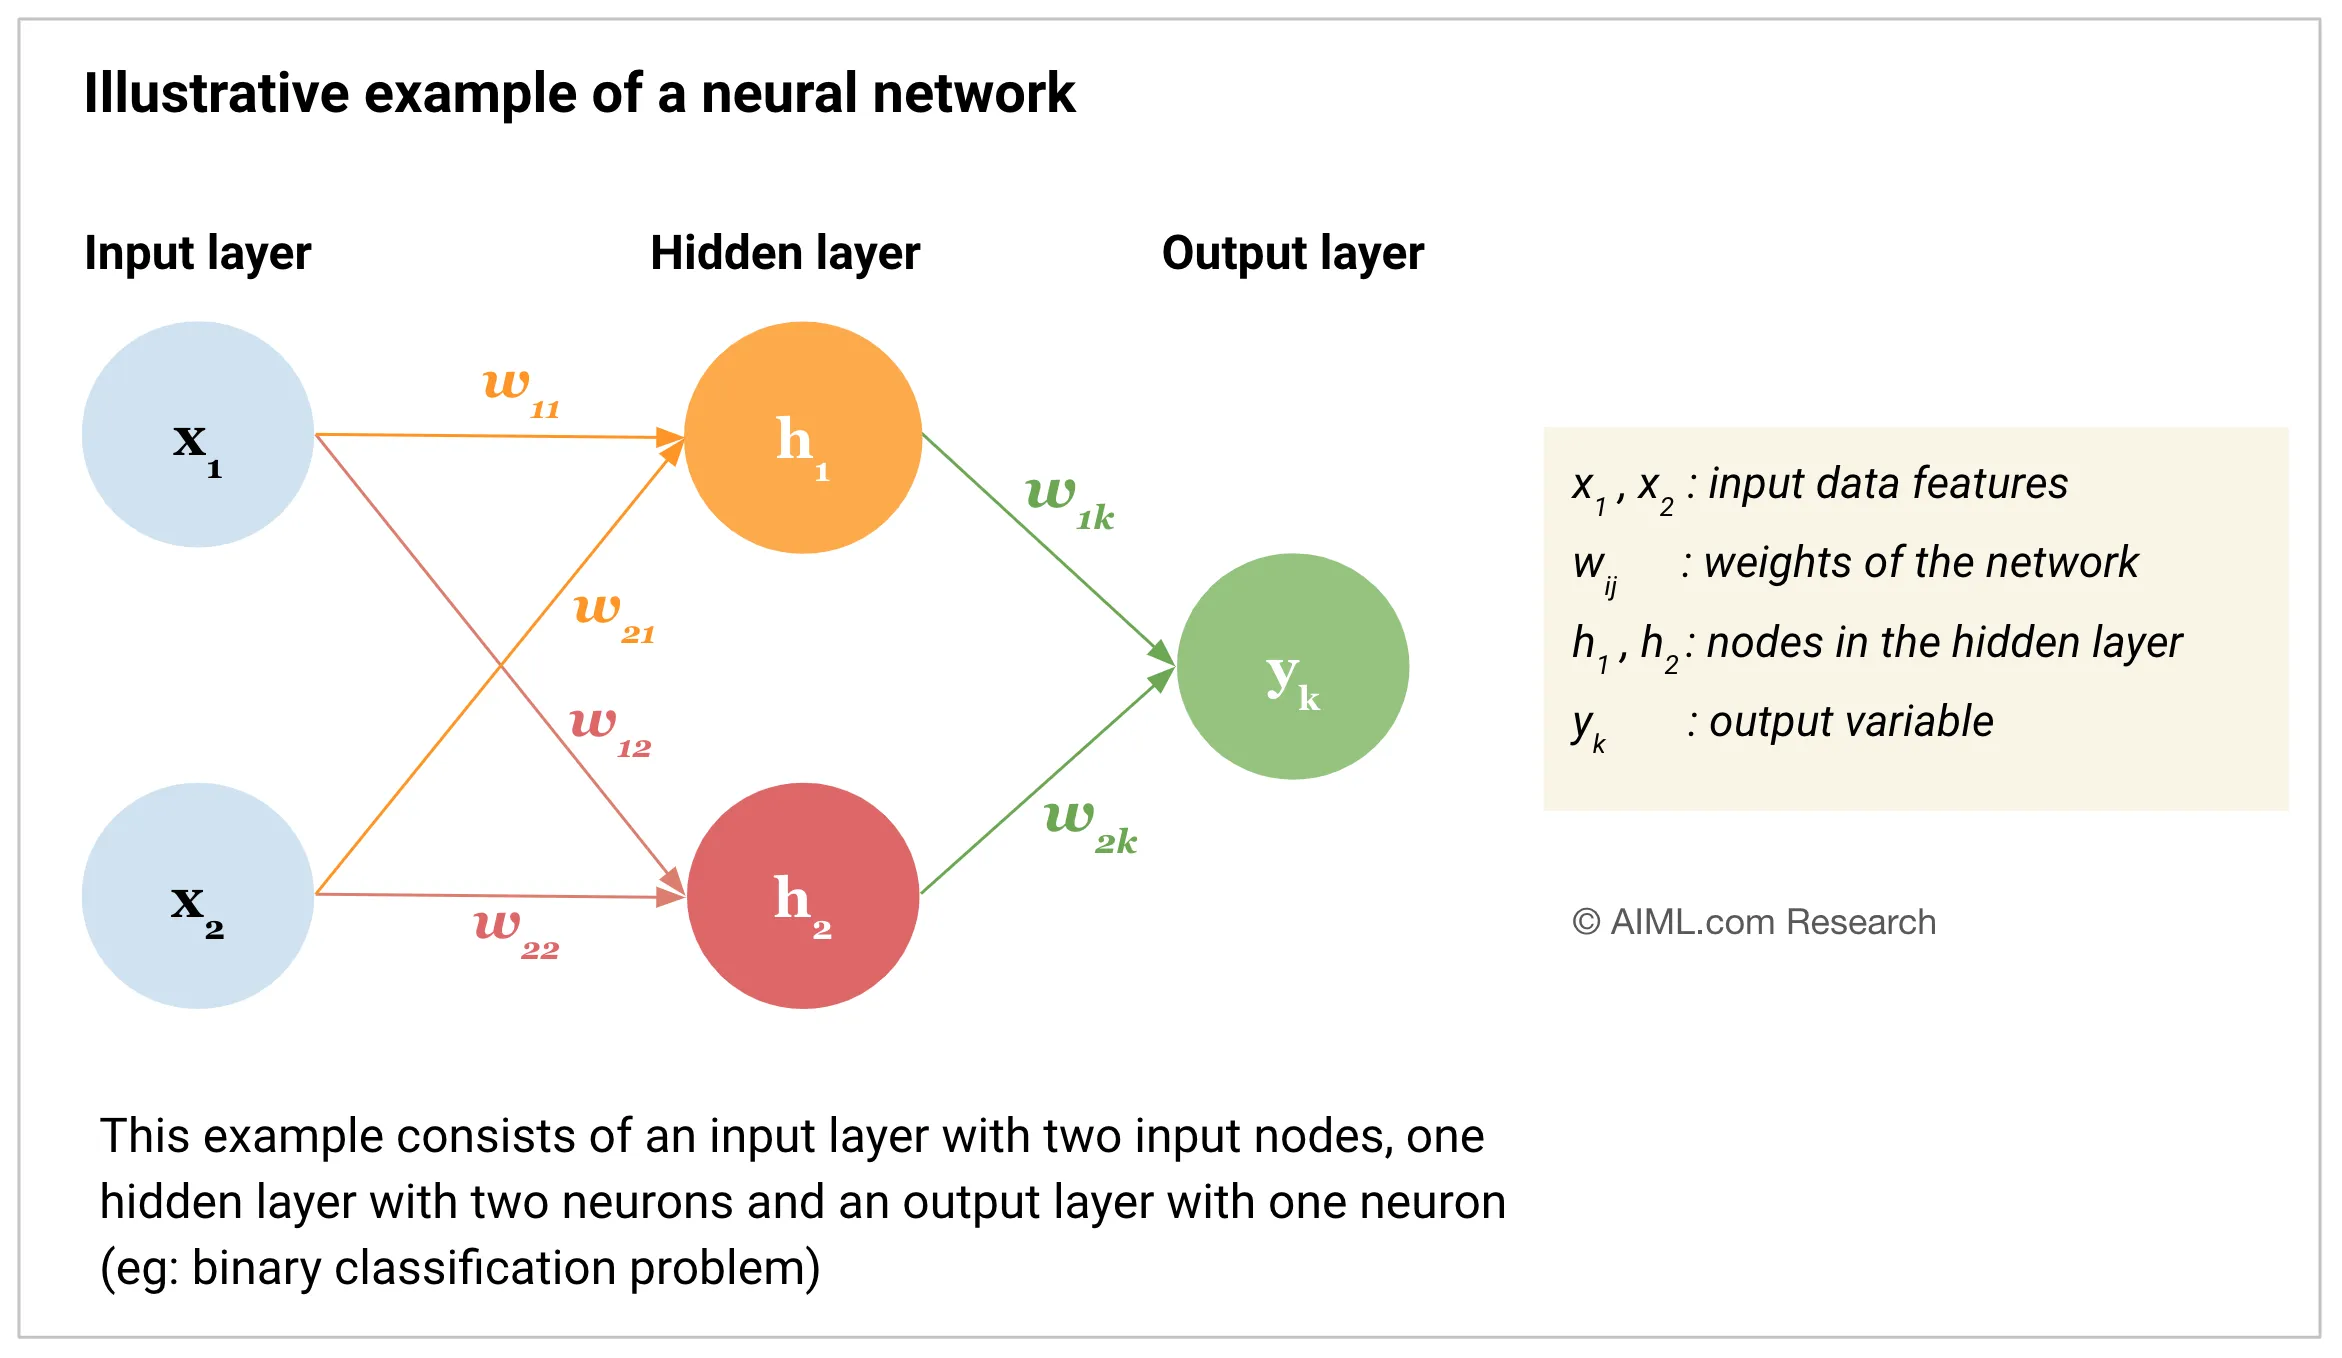

### Working Intuition:
- **Forward Propagation:** This is the process of feeding input data through the network to generate an output. Information flows from the input layer, through hidden layers, to the output layer. Each neuron performs calculations on its inputs and passes the result to the next layer.

- **Backward Propagation:** This is the process of adjusting the weights and biases of the network based on the error between the predicted output and the actual output. The error is calculated and propagated backward through the network, allowing the network to learn and improve its predictions.

### 1. Importing relevant libraries

In [1]:
# !pip install matplotlib==3.8.2
# !pip install numpy==1.26.2
# !pip install pandas==2.1.4
# !pip install scikit_learn==1.4.2
# !pip install seaborn==0.13.2
# !pip install torch==2.2.2
# !pip install torchvision==0.17.2

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [3]:
df = pd.read_csv("../Input/data.csv")

In [4]:
df.head(2)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0


#### 2. Data Cleaning

In [5]:
data = df.drop(["customer_id", "phone_no", "year"], axis=1) #Dropping the columns which doesnot make any sense in prediction

In [6]:
data.tail(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [7]:
data.describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [8]:
#checking for null values
data.isna().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [9]:
data.shape

(2000, 13)

In [10]:
data = data.dropna(axis=0)

data.shape

### 3.Data Preprocessing

In [11]:
print(data["gender"].unique())
print(data["multi_screen"].unique())
print(data["mail_subscribed"].unique())

['Female' 'Male']
['no' 'yes']
['no' 'yes']


*Before feeding this to the neural network we need to encode the categroical variables*

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
#label encoding categorical features
data["gender"] = le.fit_transform(data["gender"])
data["multi_screen"] = le.fit_transform(data["multi_screen"])
data["mail_subscribed"] = le.fit_transform(data["mail_subscribed"])

In [14]:
data.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0


In [15]:
data.groupby("churn").size()

churn
0.0    1665
1.0     253
dtype: int64

*Scaling is a crucial preprocessing step that can help improve the performance and convergence of many machine learning algorithms. It ensures that all features contribute equally to the model, prevents features with larger scales from dominating*

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
#dropping categorical columns and keeping numerical columns only
data_num = data.drop(["gender", "multi_screen", "mail_subscribed"], axis=1)

In [18]:
data_num.head(2)

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0


In [19]:
cols = data_num.columns 
data_num = scaler.fit_transform(data_num)

In [20]:
cols

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [21]:
data_num[0]

array([0.28125   , 0.25206612, 0.28192702, 0.61      , 0.28185781,
       0.30075188, 0.05263158, 0.66666667, 0.11111111, 0.        ])

In [22]:
#list of numerical columns only
cols = list(cols)
cols

['age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched',
 'maximum_days_inactive',
 'customer_support_calls',
 'churn']

In [23]:
data.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0


In [24]:
data[cols] = data_num

In [25]:
data.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,0.281250,0.252066,0,0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,0,0.328125,0.611570,0,0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0


In [26]:
#defining dependent and indenpendent variables
X = data.drop("churn", axis=1)
Y = data["churn"].astype(int)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=0.2, random_state=42)

### 4. Building Sequential Neural Network in Pytorch

In [29]:
X.shape

(1918, 12)

In [30]:
input_size= X.shape[1]
hidden_sizes = [128, 64]#no.of hidden layers
output_size = 2 #Probability distribution of size 2

In [31]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),#12x128
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),#12x64
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),#64x2
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=12, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=2, bias=True)
  (5): Softmax(dim=1)
)


In [32]:
#Alternate way to define neural network
# from collections import OrderedDict
# model_dict = nn.Sequential(OrderedDict([
#                       ('fc1', nn.Linear(input_size, hidden_sizes[0])),
#                       ('relu1', nn.ReLU()),
#                       ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
#                       ('relu2', nn.ReLU()),
#                       ('output', nn.Linear(hidden_sizes[1], output_size)),
#                       ('softmax', nn.Softmax(dim=1))]))


*Negative Log Likelihood Loss commonly used for classification tasks*

In [33]:
criterion = nn.NLLLoss()

In [34]:
from torch import optim
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [35]:
X_train

array([[0.        , 0.296875  , 0.11983471, ..., 0.36842105, 0.66666667,
        0.11111111],
       [0.        , 0.203125  , 0.52066116, ..., 0.21052632, 0.5       ,
        0.22222222],
       [0.        , 0.46875   , 0.28099174, ..., 0.21052632, 0.66666667,
        0.33333333],
       ...,
       [0.        , 0.328125  , 0.51652893, ..., 0.15789474, 0.5       ,
        0.22222222],
       [1.        , 0.5       , 0.45867769, ..., 0.10526316, 0.66666667,
        0.        ],
       [1.        , 0.59375   , 0.47933884, ..., 0.10526316, 0.5       ,
        0.11111111]])

In [36]:
y_train

474     0
163     0
1847    0
982     0
1867    0
       ..
1195    0
1359    0
925     0
1529    0
1191    1
Name: churn, Length: 1534, dtype: int32

In [37]:
import torch.utils.data as Data
from torch import Tensor
import numpy as np

#converting data into tensor to pass it to pytorch sequential layer
X_train = Tensor(X_train)
y_train = Tensor(np.array(y_train))

*Now we'll set up a data loader for training the neural network*

In [38]:
BATCH_SIZE = 64 #number of samples fed into the neural network during each training iteration. 
#TensorDataset is a PyTorch class that allows you to create a dataset from tensors
torch_dataset = Data.TensorDataset(X_train, y_train) 

#loading data for the model
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)
#Shuffles the data within the dataset before creating batches in each epoch. 
#Shuffling helps the model learn from different data combinations and improve generalization.
#number of worker threads to use for data loading. More is the number, more is the speed when working with large datasets or performing data augmentation.

## Training the model

In [39]:
import torch
from torch.autograd import Variable

epochs = 50 #No. of iterations over the intire dataset
for e in range(epochs):
    running_loss = 0
    for step, (batch_x, batch_y) in enumerate(loader):
        #Batch of training features & training labels
        # b_x = Variable(batch_x)
        # b_y = Variable(batch_y.type(torch.LongTensor))
        b_x = batch_x  # No need for Variable in recent PyTorch versions
        b_y = batch_y.type(torch.LongTensor)  # Convert batch_y to LongTensor if needed
        
        # Training pass
        # Sets the gradients of the model's parameters to zero before each training iteration. This ensures gradients accumulate properly during backpropagation.
        optimizer.zero_grad()
        #Passes the batches of data via neural network to get predictions
        output = model(b_x)
        #Calculates the loss
        loss = criterion(output, b_y)
        #Performs backpropagation to calculate the gradients of the loss function with respect to the model's parameters.
        loss.backward()
        #Updates the parameters
        optimizer.step()
        # Accumulates the training loss for each batch within an epoch.
        running_loss += loss.item()
        
    else:
        #Average loss each epoch
        print(f"Training loss: {running_loss/len(X_train)}")

Training loss: -0.007685357503194697
Training loss: -0.008288009497768098
Training loss: -0.008881422189565806
Training loss: -0.009471265518991702
Training loss: -0.01006171880520618
Training loss: -0.010644015658165983
Training loss: -0.011191139048672095
Training loss: -0.01167151802055528
Training loss: -0.012068420337729225
Training loss: -0.012380411020313745
Training loss: -0.012621084084877601
Training loss: -0.012803876298969076
Training loss: -0.012944433998408809
Training loss: -0.013051782235639192
Training loss: -0.013135697104940202
Training loss: -0.013201464768960548
Training loss: -0.013252820076501044
Training loss: -0.013296364067119912
Training loss: -0.01333172617400019
Training loss: -0.013362071582515673
Training loss: -0.013387441712843237
Training loss: -0.013406174240398283
Training loss: -0.01342479688403193
Training loss: -0.013441619770467825
Training loss: -0.013454816720631785
Training loss: -0.013466678899767501
Training loss: -0.01347648549577248
Traini

In [40]:
#testing with test data
X_test = Tensor(X_test)
y_test = Tensor(np.array(y_test))
z = model(X_test)

In [41]:
z[0]

tensor([0.9881, 0.0119], grad_fn=<SelectBackward0>)

In [42]:
#getting prediction by the model
yhat = list(z.argmax(1))
yhat[0]

tensor(0)

*argmax helps us identify which class has the highest confidence*

In [43]:
#converting tensor into list
y_test = list(y_test)
y_test[0]

tensor(0.)

In [44]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.859375

In [45]:
#It can be further optimized by hyperparameter tuning. This notebook is intended for understanding Neural Networks with Pytorch